![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Heatmap DateTime
</b>
</span>

---
**Notebook version**: `1` (25 Mar 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Plots a heatmap of a time series.
- In this example, an air temperature time series measured at half-hourly time resolution over 10 years is used.
- Since this class uses diive's `TimestampSanitizer` class, it is important that the timestamp of the input data is correctly named, i.e., `TIMESTAMP_START`, `TIMESTAMP_MIDDLE` or `TIMESTAMP_END`.
- These timestamp names are strictly required, because a timestamp index simply named `TIMESTAMP` does not give info about start and end of the respective averaging interval.

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.71.7


In [2]:
help(HeatmapDateTime)

Help on class HeatmapDateTime in module diive.core.plotting.heatmap_datetime:

class HeatmapDateTime(builtins.object)
 |  HeatmapDateTime(series: pandas.core.series.Series, fig=None, ax=None, title: str = None, vmin: float = None, vmax: float = None, cb_digits_after_comma: int = 2, cb_labelsize: float = 16, axlabels_fontsize: float = 16, ticks_labelsize: float = 16, minyticks: int = 3, maxyticks: int = 10, cmap: str = 'RdYlBu_r', color_bad: str = 'grey', display_type: str = 'time_date', figsize: tuple = (6, 10.7), verbose: bool = False)
 |  
 |  # @ConsoleOutputDecorator(spacing=False)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, series: pandas.core.series.Series, fig=None, ax=None, title: str = None, vmin: float = None, vmax: float = None, cb_digits_after_comma: int = 2, cb_labelsize: float = 16, axlabels_fontsize: float = 16, ticks_labelsize: float = 16, minyticks: int = 3, maxyticks: int = 10, cmap: str = 'RdYlBu_r', color_bad: str = 'grey', display_type: str = 'time_date'

</br>

# **Load example data**

In [3]:
df = load_exampledata_parquet()
series_30min = df['Tair_f']
series_30min

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.058 seconds). Detected time resolution of <30 * Minutes> / 30T 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618000
2013-01-01 00:45:00   -1.630000
2013-01-01 01:15:00   -1.644000
2013-01-01 01:45:00   -1.657000
2013-01-01 02:15:00   -0.567000
                         ...   
2022-12-31 21:45:00    3.463333
2022-12-31 22:15:00    5.283333
2022-12-31 22:45:00    5.536667
2022-12-31 23:15:00    4.963333
2022-12-31 23:45:00    6.490000
Freq: 30T, Name: Tair_f, Length: 175296, dtype: float64

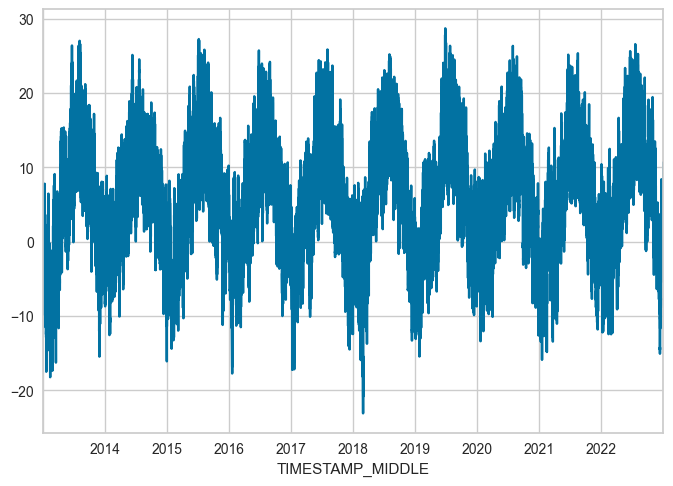

In [4]:
series_30min.plot();

</br>

# (1) **Plot heatmap with half-hourly data**

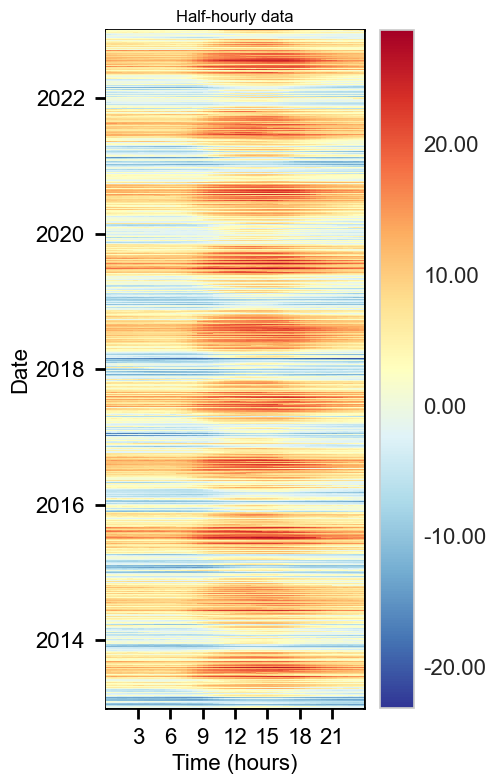

In [5]:
hm = HeatmapDateTime(
    series=series_30min,
    title="Half-hourly data",
    display_type='time_date',
    figsize=(5, 8)
)
hm.show()

In [6]:
# Get ax in which the plot was generated
this_ax = hm.get_ax()
this_ax

<Axes: title={'center': 'Half-hourly data'}, xlabel='Time (hours)', ylabel='Date'>

</br>

# (2) **Plot heatmap with hourly data**

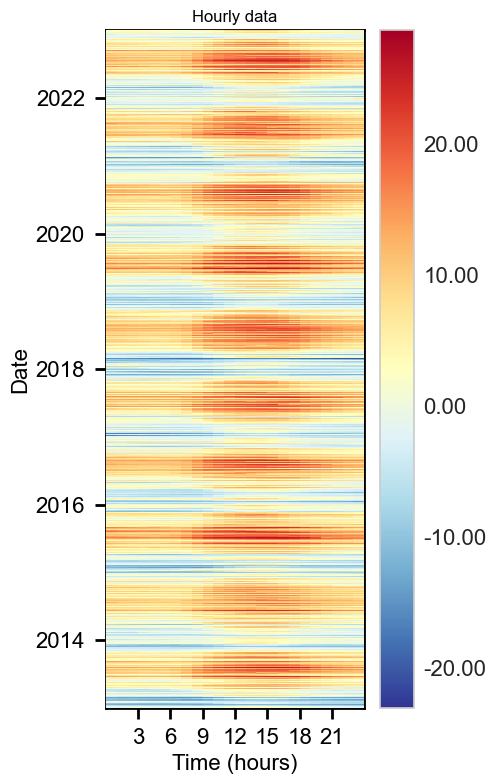

In [7]:
# Resample example data to hourly time resolution
series_1h = series_30min.resample('1h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_1h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_1h,
    title="Hourly data",
    display_type='time_date',
    figsize=(5, 8)
)
hm.show()

</br>

# (3) **Plot heatmap with 6-hourly data**

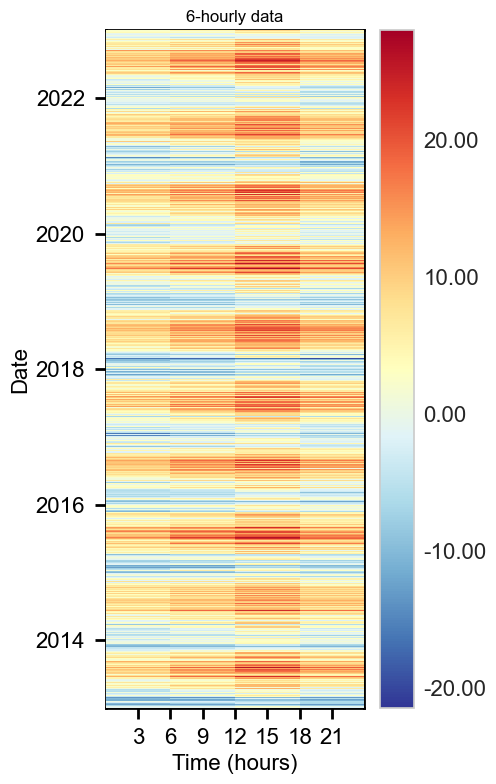

In [8]:
# Resample example data to 6-hourly time resolution
series_6h = series_30min.resample('6h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_6h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_6h,
    title="6-hourly data",
    display_type='time_date',
    figsize=(5, 8)
)
hm.show()

</br>

# (4) **Plot heatmap with 12-hourly data**

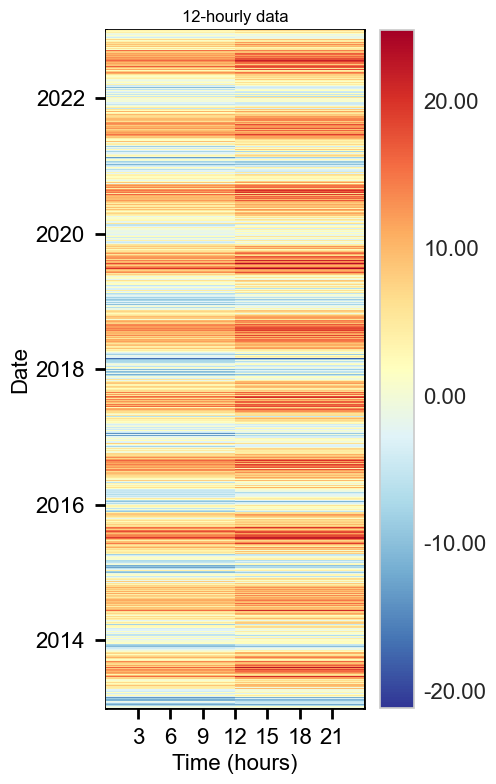

In [9]:
# Resample example data to 12-hourly time resolution
series_12h = series_30min.resample('12h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_12h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_12h,
    title="12-hourly data",
    display_type='time_date',
    figsize=(5, 8)
)
hm.show()

</br>

# **End of notebook**

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-03-24 23:10:04
